## Multiclass Classification: Wine Dataset
https://archive.ics.uci.edu/ml/datasets/wine

** Dataset Information: **

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

** Attribute Information: (13 features and 1 class)**

Class: class 1 (59), class 2 (71), class 3 (48)

1. Alcohol (class)
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

** Objective of this project **

Using chemical analysis (features) determine the origin of wines (class, 1-3)

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names = ['Class','Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
df = pd.read_csv(url, names=names)

In [3]:
# Inspect Data
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.tail()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.shape

(178, 14)

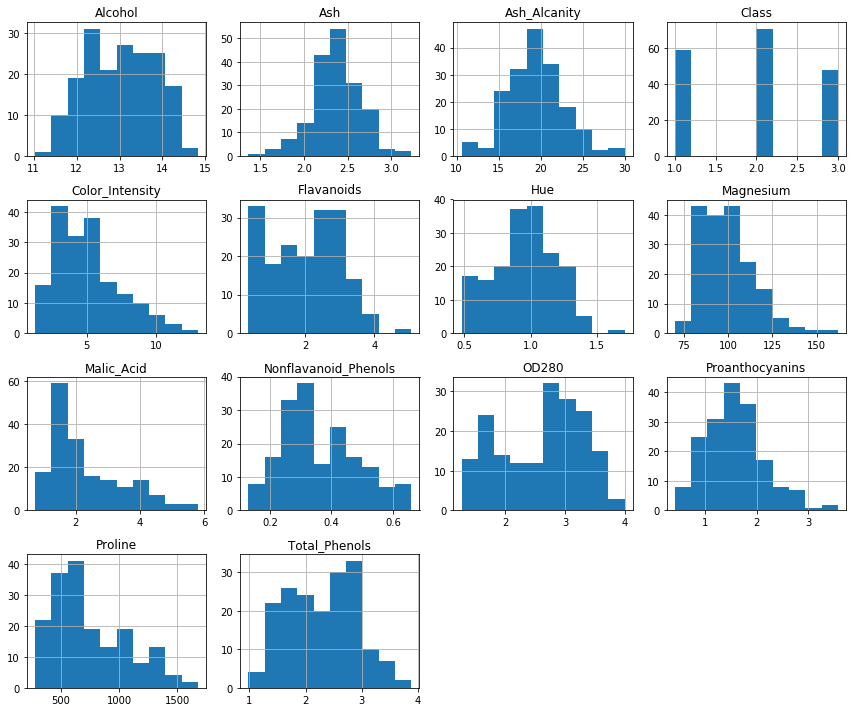

In [6]:
_ = df.hist(figsize=(12,12))
plt.tight_layout()

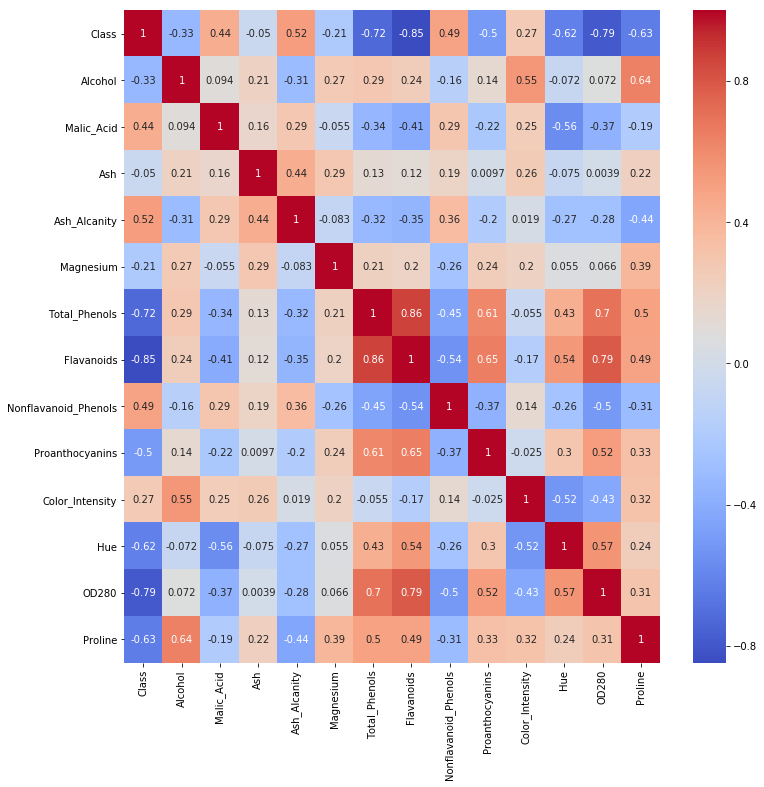

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [9]:
df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [11]:
df.isnull().any()

Class                   False
Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

## Data preprocessing

In [4]:
seed = 7 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [5]:
X = df.drop('Class', axis=1).values
#encode categorical to binary
y = pd.get_dummies(df['Class']).values
print(X.shape,y.shape)

(178, 13) (178, 3)


In [6]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=uint8), array([356, 178], dtype=int64))

** Split Train Test Sets **

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)#stratify=y
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142, 3) (36, 3)


** Scale features **

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Model

### LDA: best ML algorithm

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
model = LinearDiscriminantAnalysis(shrinkage=0.2, solver='lsqr')
model.fit(X_train, np.argmax(y_train,axis=1))
accuracy = model.score(X_train, np.argmax(y_train,axis=1))
y_pred = model.predict(X_test)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100))

Accuracy of train set: 100.0%
Accuracy of test set: 100.0%


### Baseline MSP model

In [17]:
# Import libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn.model_selection import KFold,GridSearchCV,StratifiedKFold

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 93        
Total params: 2,373
Trainable params: 2,373
Non-trainable params: 0
_________________________________________________________________
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


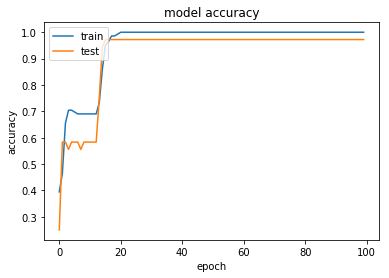

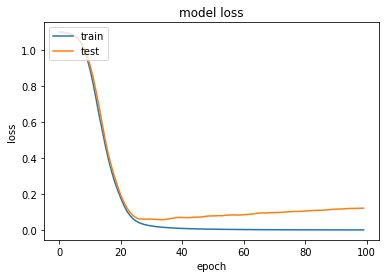

loss of train set: 0.001
accuracy of train set: 100.0%
loss of test set: 0.122
accuracy of test set: 97.2%


In [27]:
K.clear_session()
np.random.seed(seed)
#create model
model = Sequential()
model.add(Dense(30, kernel_initializer='uniform', input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#fit model
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=100,verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

## Parameter Tuning
try to get a tie with LDA (100%)

### Batch size &  Epochs

In [28]:
K.clear_session()
np.random.seed(seed)
def create_model():
    model = Sequential()
    model.add(Dense(30, kernel_initializer='uniform', input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
classifier = KerasClassifier(build_fn=create_model)

# Grid Search
batch_size = [10,20,30]
epochs = [20,40,60]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(classifier, param_grid=param_grid,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

95/95 [==============================] - 0s 42us/step
0.971831 (0.010119) with: {'batch_size': 10, 'epochs': 20}
0.971831 (0.010119) with: {'batch_size': 10, 'epochs': 40}
0.978873 (0.017402) with: {'batch_size': 10, 'epochs': 60}
0.978873 (0.000210) with: {'batch_size': 20, 'epochs': 20}
0.971831 (0.010119) with: {'batch_size': 20, 'epochs': 40}
0.971831 (0.010119) with: {'batch_size': 20, 'epochs': 60}
0.908451 (0.072289) with: {'batch_size': 30, 'epochs': 20}
0.964789 (0.020130) with: {'batch_size': 30, 'epochs': 40}
0.971831 (0.010119) with: {'batch_size': 30, 'epochs': 60}
Best: 97.9% using {'batch_size': 10, 'epochs': 60}


### Optimizer

In [29]:
K.clear_session()
np.random.seed(seed) #
def create_model(optimizer='adam'):     
    model = Sequential()
    model.add(Dense(30, kernel_initializer='uniform', input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=10
epochs=40
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
optimizer = ['sgd', 'rmsprop', 'adam']#, 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0)
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

95/95 [==============================] - 0s 84us/step
0.295775 (0.017558) with: {'optimizer': 'sgd'}
0.971831 (0.010119) with: {'optimizer': 'rmsprop'}
0.978873 (0.017402) with: {'optimizer': 'adam'}


Best: 97.9% using {'optimizer': 'adam'}


### Initializer

In [30]:
K.clear_session()
np.random.seed(seed)
def create_model(init_mode='uniform',optimizer='adam'):     
    model = Sequential()
    model.add(Dense(30, kernel_initializer=init_mode, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(30, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(30, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=10
epochs=40
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
init_mode = ['uniform', 'glorot_normal','zero']#,'lecun_uniform', 'normal',   'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))  
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

95/95 [==============================] - 0s 126us/step
0.971831 (0.026549) with: {'init_mode': 'uniform'}
0.971831 (0.010119) with: {'init_mode': 'glorot_normal'}
0.295775 (0.017558) with: {'init_mode': 'zero'}


Best: 97.2% using {'init_mode': 'uniform'}


### Activation function

In [31]:
K.clear_session()
np.random.seed(seed) 
def create_model(activation='relu',init_mode='uniform',optimizer='adam'):     
    model = Sequential()
    model.add(Dense(30, kernel_initializer=init_mode, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(30, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(30, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=10
epochs=40
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
activation = ['relu', 'tanh', 'sigmoid','linear']#'softmax', 'softplus', 'softsign',  'hard_sigmoid', ]
param_grid = dict(activation=activation)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))  
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

95/95 [==============================] - 0s 126us/step
0.964789 (0.020130) with: {'activation': 'relu'}
0.985915 (0.009908) with: {'activation': 'tanh'}
0.760563 (0.126795) with: {'activation': 'sigmoid'}
0.971831 (0.010119) with: {'activation': 'linear'}
Best: 98.6% using {'activation': 'tanh'}


#### Dropout

In [32]:
K.clear_session()
np.random.seed(seed) 
def create_model(dropout_rate=0.0, activation='tanh',
                 init_mode='uniform',optimizer='adam'):     
    model = Sequential()
    model.add(Dense(30, kernel_initializer=init_mode, 
                    input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(30, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(30, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=10
epochs=40
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
dropout_rate = [0.0, 0.1, 0.2, 0.3]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))  
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

95/95 [==============================] - 0s 126us/step
0.985915 (0.009908) with: {'dropout_rate': 0.0}
0.985915 (0.009908) with: {'dropout_rate': 0.1}
0.978873 (0.017312) with: {'dropout_rate': 0.2}
0.964789 (0.020130) with: {'dropout_rate': 0.3}
Best: 98.6% using {'dropout_rate': 0.0}


## Final Model 
#### params: epochs=40, batch_size=10, optimizer='adam', kernel_initializer='uniform', activation='relu' (as baseline execept for epochs)

In [40]:
K.clear_session()
np.random.seed(seed) 
# train model
model = Sequential()
model.add(Dense(30, kernel_initializer='uniform', input_shape=(X_train.shape[1],), 
                activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40, batch_size=10,verbose=0)
# evaluate model on train set
scores = model.evaluate(X_train,y_train, verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))

loss of train set: 0.001
accuracy of train set: 100.0%


** Save and load the final model to JSON or YAML ** https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

** 1) JSON **

In [42]:
# save model as JSON
filename = 'model'
# model architecture
model_json = model.to_json()
with open(filename+'.json', 'w') as json_file:
    json_file.write(model_json)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.json,',filename+'.h5')

Saved model in model.json, model.h5


In [82]:
#del model

In [43]:
#load model from JSON
filename = 'model'
# model architecture
from keras.models import model_from_json
json_file = open(filename+'.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.json,',filename+'.h5')
print(model.summary())

Loaded model from model.json, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 93        
Total params: 2,373
Trainable params: 2,373
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
# evaluate loaded model on test data
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

loss of test set: 0.075
accuracy of test set: 97.2%


** 2) YAML **

In [85]:
# save model as YAML
filename = 'model'
# model architecture
model_yaml= model.to_yaml()
with open(filename+'.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.yaml,',filename+'.h5')

Saved model in model.yaml, model.h5


In [86]:
#load model from YAML
filename = 'model'
# model architecture
from keras.models import model_from_yaml
yaml_file = open(filename+'.json', 'r')
model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(model_yaml)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.yaml,',filename+'.h5')
print(model.summary())

Loaded model from model.yaml, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
# evaluate loaded model on test data
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

loss of test set: 0.075
accuracy of test set: 97.2%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        52
          1       1.00      1.00      1.00        54
          2       1.00      1.00      1.00        36

avg / total       1.00      1.00      1.00       142



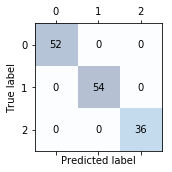

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(np.argmax(y_train,axis=1), model.predict_classes(X_train,verbose=0)))

#confusion matrix
confmat = confusion_matrix(np.argmax(y_train,axis=1), model.predict_classes(X_train,verbose=0))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [51]:
# predict class with test set (new, unseen)
y_pred = model.predict_classes(X_test,verbose=0)
print('Accuracy: {:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100))

Accuracy: 97.2%


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.94      1.00      0.97        17
          2       1.00      0.92      0.96        12

avg / total       0.97      0.97      0.97        36



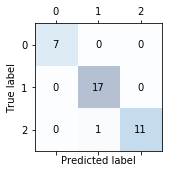

In [52]:
#classification report
print(classification_report(np.argmax(y_test,axis=1), model.predict_classes(X_test,verbose=0)))

#confusion matrix
confmat = confusion_matrix(np.argmax(y_test,axis=1), model.predict_classes(X_test,verbose=0))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

- Model Architecture: 3 hidden layers (30 nodes for each)

    
- Best params: epochs=40, batch_size=10, optimizer='adam', kernel_initializer='uniform', activation='relu'

    
- Accuracy of test set: ** 97.2% ** (1 missclassified from small test set)